# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plot_learning_curve as plotlearn

from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Carrega os dados
data = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)
# Reinicia o index
data = data.reset_index()
# Pega os IDs unicos campo 'subject'
unisub = list(data['subject'].unique())
# Cria ID numerico sequencial
mlist = [int(x) for x in range(len(unisub))]
# Vincula o Id numerico com o campo 'subject'
newvalue = dict(zip(unisub, mlist))
# Exibe dados tratados
data['subject'] = data['subject'].map(newvalue)

# Divide o conjunto de dados utilizando a proporção 80:20
train, test = train_test_split(data, test_size = 0.2)

features = list(data.columns[2:])
scaler = StandardScaler()

X = train[features].values
y = train['subject'].values

X = scaler.fit_transform(X)

In [3]:
keystrokeSvc = svm.SVC(kernel='rbf', C=100, gamma=0.01)

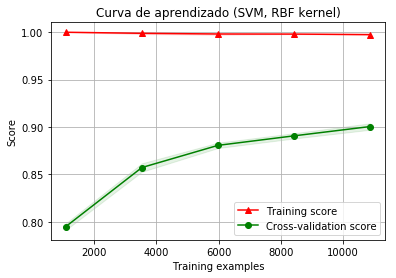

In [4]:
title = "Curva de aprendizado (SVM, RBF kernel)"
plotlearn.plot_learning_curve(keystrokeSvc, title, X, y)

plt.show()

In [5]:
keystrokeSvc.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
x_test = test[features]
y_test = test['subject']

x_test = scaler.fit_transform(x_test)
predicted_output = keystrokeSvc.predict(x_test)

In [7]:
model_accuracy = metrics.accuracy_score(y_test, predicted_output)
model_accuracy

0.90612745098039216